In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

npf = pd.read_csv('data/npf_train.csv')
npf.drop("partlybad", axis=1, inplace=True)
npf.set_index("date", inplace=True)
npf["class4"] = npf["class4"].astype("category")
npf.drop("id", axis=1, inplace=True)
class2 = np.array(["event"]*npf.shape[0],dtype="object")
class2[npf["class4"]=="nonevent"] = "nonevent"
npf.insert(0, 'class2', class2)
npf["class2"] = npf["class2"].astype("category")
npf.insert(2, "year", pd.DatetimeIndex(npf.index).year)
npf.insert(2, "month", pd.DatetimeIndex(npf.index).month)
npf.insert(2, "event", pd.get_dummies(npf["class2"])["event"])

In [27]:
npf

,class2,class4,event,month,year,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,nonevent,nonevent,0,1,2000,384.462000,2.284996,384.164462,2.135062,385.274688,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
2000-01-20,nonevent,nonevent,0,1,2000,374.884615,0.415185,374.703333,0.385179,375.621266,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2000-01-23,nonevent,nonevent,0,1,2000,373.496585,0.189497,373.382593,0.172958,373.961481,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
2000-02-17,nonevent,nonevent,0,2,2000,378.600367,1.934180,378.464862,1.946536,379.785872,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
2000-03-25,event,Ib,1,3,2000,373.128684,1.096617,372.980000,1.047750,373.701830,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-14,nonevent,nonevent,0,8,2011,377.541538,6.391551,377.802756,6.187754,380.131355,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
2011-08-16,nonevent,nonevent,0,8,2011,381.016623,4.411571,381.030844,4.062115,382.901742,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
2011-08-18,nonevent,nonevent,0,8,2011,386.687895,12.065627,386.284079,11.751004,392.981111,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391


nonevent    229
II          117
Ib           83
Ia           29
Name: class4, dtype: int64


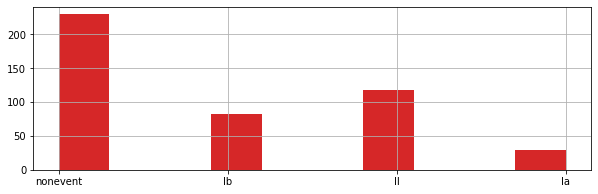

In [28]:
# dependent var
npf['class4'].hist(figsize=(10,3), color='C3')
print(npf['class4'].value_counts())

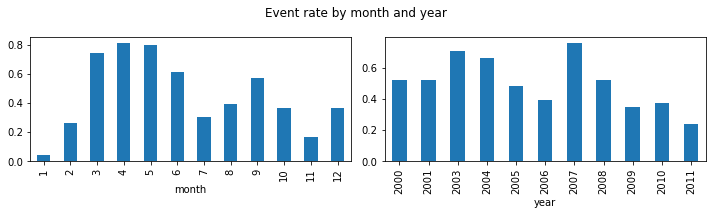

In [29]:
# event rates at different times
times = pd.DataFrame(npf[["month", "year", "event"]])
fig, ax = plt.subplots(1, 2, figsize=(10,3))
times.groupby("month").mean()["event"].plot.bar(ax=ax[0])
times.groupby("year").mean()["event"].plot.bar(ax=ax[1])
plt.suptitle("Event rate by month and year")
plt.tight_layout()
plt.show()

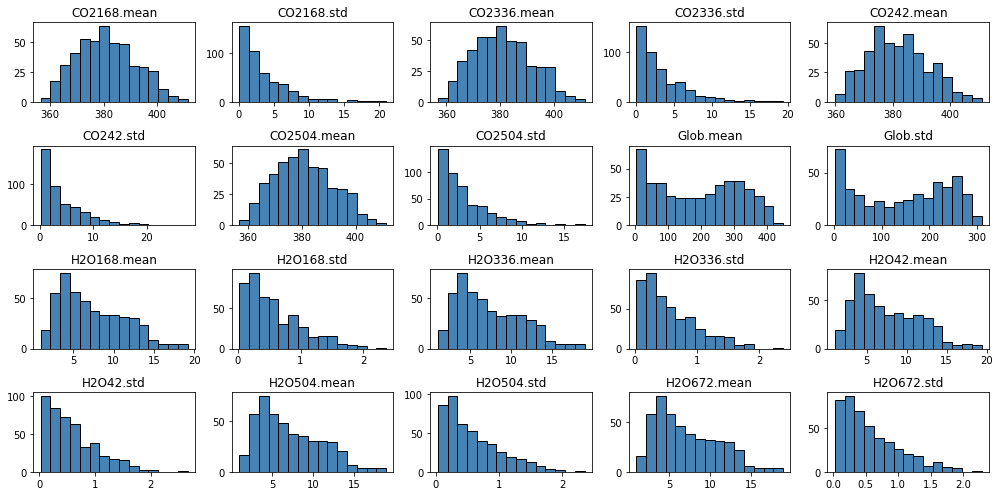

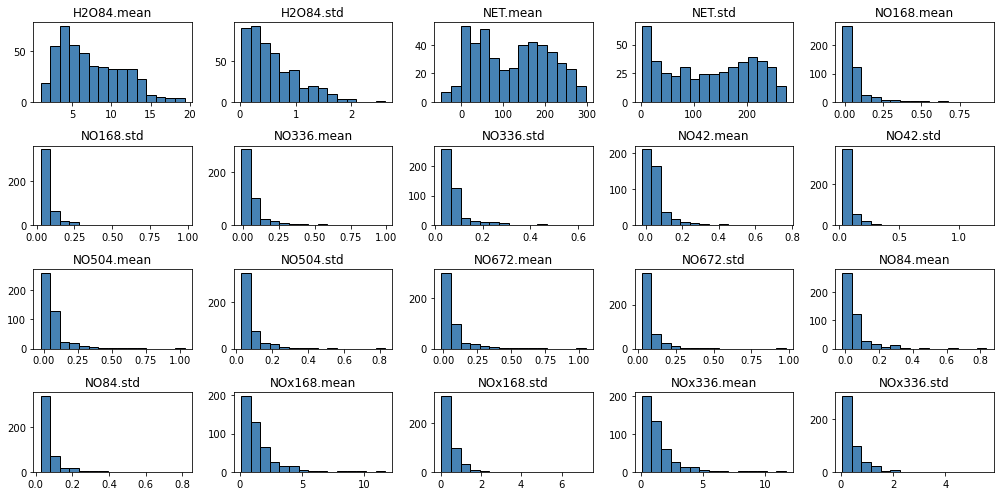

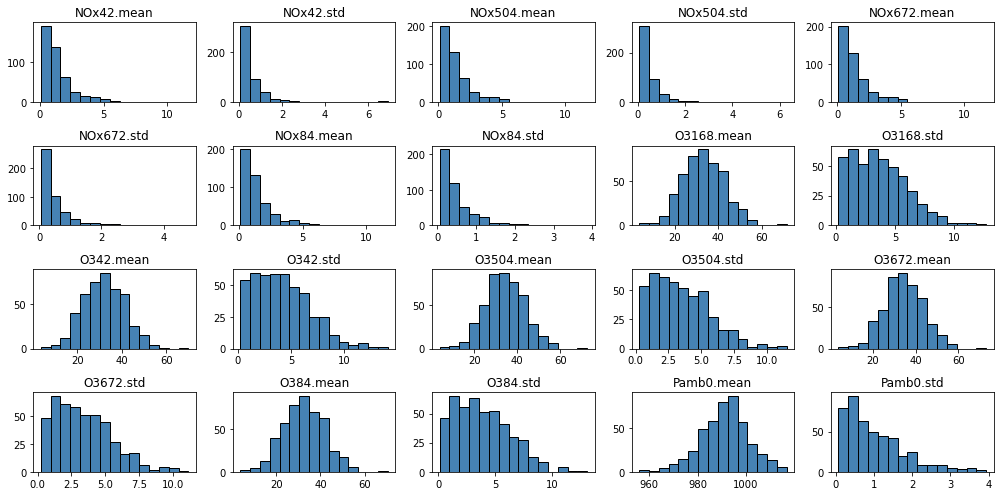

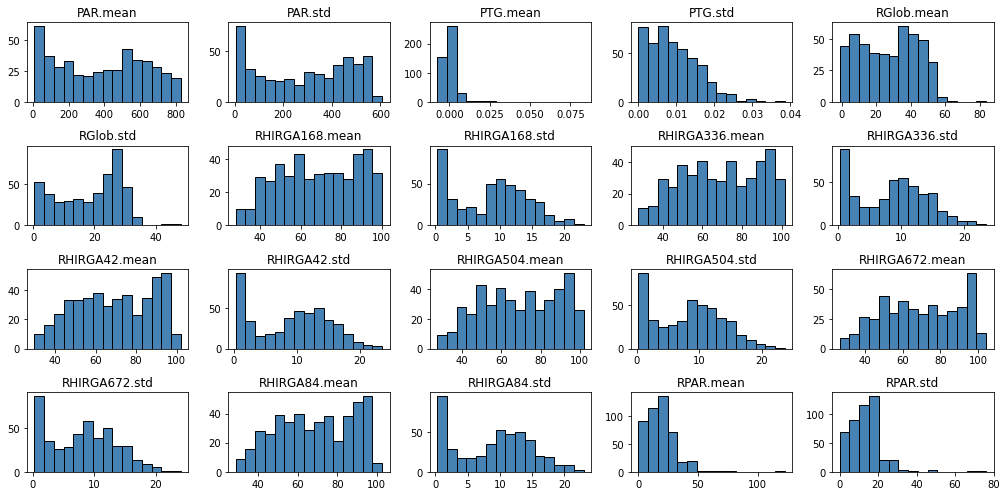

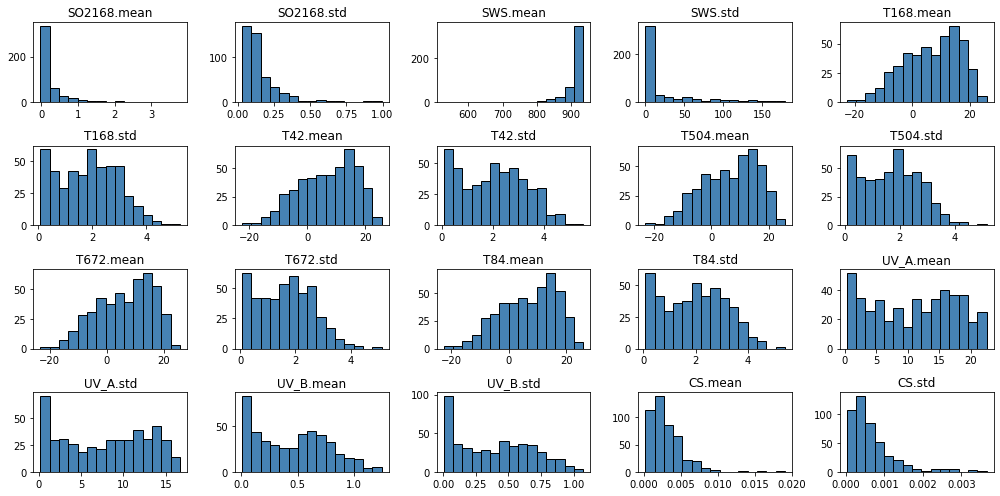

In [30]:
# independent vars
cols = list(npf.columns[-100:])
for i in range(0, len(cols), 20):
    npf[cols[i:i+20]].hist(bins=15,
                           edgecolor='black',
                           linewidth=1.0,
                           color='steelblue',
                           grid=False,
                           figsize=(14, 7),
                           layout=(4, 5))
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation matrix')

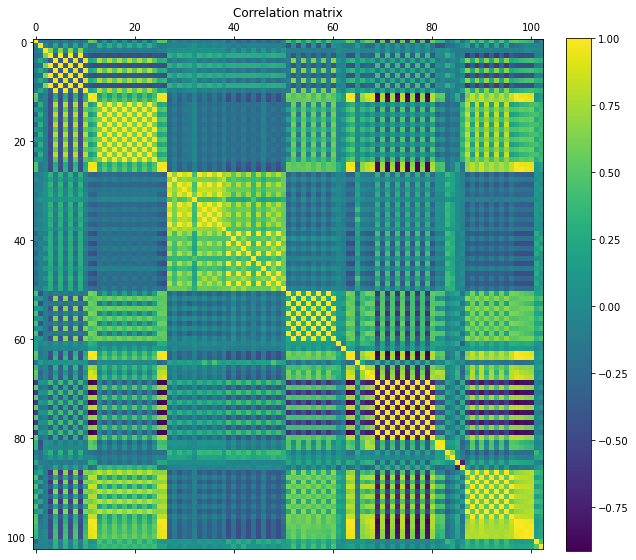

In [31]:
# correlation matrix
fig = plt.figure(figsize=(10,10))
mat = plt.matshow(npf.corr(), fignum=fig.number)
cb = plt.colorbar(mat, fraction=0.046, pad=0.04)
plt.title("Correlation matrix")